In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [526]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
sns.set_theme()

In [598]:
import os
import json

In [660]:
results_root = '/home/kwatchar3/bss_spatial_eval/results/lowpass'

ddfs = os.listdir(results_root)
print(ddfs)


dfs = []

for d in ddfs:
    print(os.listdir(os.path.join(results_root, d)))
    df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
    # print(args.get('estim_filter_kwargs'))
    if args['estim_filter_kwargs']:
        df['cutoff'] = args['estim_filter_kwargs']['Wn'][0]
    else:
        df['cutoff'] = 16000
    dfs.append(df)

df = pd.concat(dfs)
df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 





palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

['20221127235837', '20221128000349', '20221128000226', '20221127235755', '20221127235928', '20221128000137', '20221128000309', '20221127235800', '20221128000036']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']


In [679]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(df.cutoff.min(), df.cutoff.max()), cmap=palette), 
        ax=ax, label='cutoff frequency (Hz)', 
        pad=0.01, aspect=30, 
        ticks=[250, 500, 1000, 2000, 4000, 8000],
        format=lambda v, t: f"{int(v//1000)}k" if v >= 1000 else str(v)
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

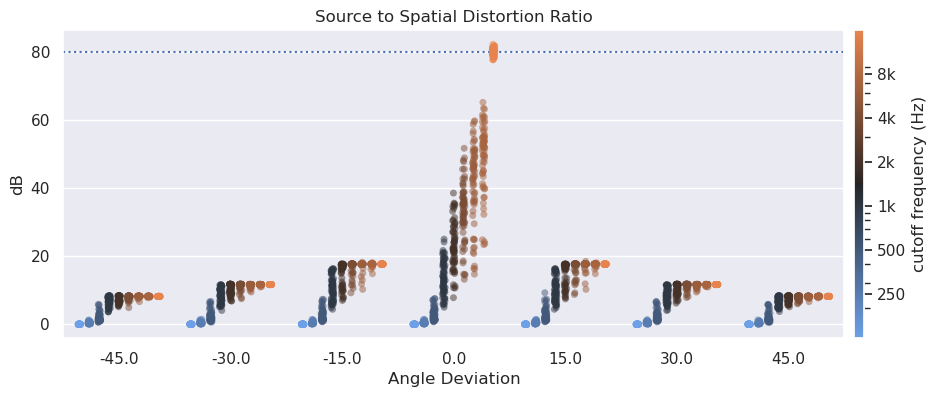

In [683]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))
 
line = 80
    
df['spr/numx'] = df['spr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)
    
ax = sns.stripplot(df,  y='spr/numx', x='est_deviation', hue='cutoff', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='dB', title='Source to Spatial Distortion Ratio', xlabel='Angle Deviation')

set_axes(fig, ax, line)
plt.show()

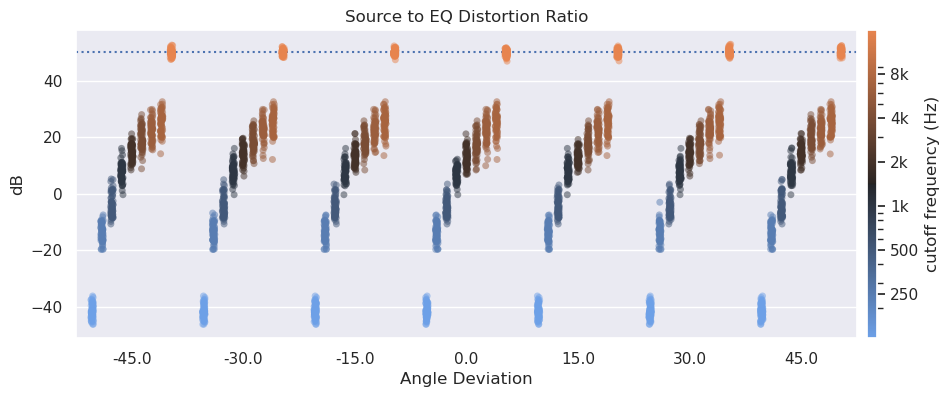

In [684]:
# ax = sns.scatterplot(df[~(df['filt'].str.contains('no'))], x='est_deviation_j', y='sfr/num', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))

line = 50

df['sfr/numx'] = df['sfr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

ax = sns.stripplot(df,  y='sfr/numx', x='est_deviation', hue='cutoff', palette=palette, ax=ax, alpha=0.5, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='dB', title='Source to EQ Distortion Ratio', xlabel='Angle Deviation')
set_axes(fig, ax, line)
plt.show()

In [ ]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='cutoff', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
set_axes(fig, ax, line=None)
plt.show()